In [1]:
import os
import keras

Using TensorFlow backend.


In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
train = pd.read_csv('data/Medicalpremium.csv')
print('Shape of the train data with all features:', train.shape)
train = train.select_dtypes(exclude=['object'])
print("")
print('Shape of the train data with numerical features:', train.shape)
#train.drop('Id',axis = 1, inplace = True)
train.fillna(0,inplace=True)

Shape of the train data with all features: (986, 11)

Shape of the train data with numerical features: (986, 11)


In [4]:
test = train[600:986]
test = test.select_dtypes(exclude=['object'])
#ID = test.Id
test.fillna(0,inplace=True)
#test.drop('Id',axis = 1, inplace = True)

In [5]:
train.head(5)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
Age                        986 non-null int64
Diabetes                   986 non-null int64
BloodPressureProblems      986 non-null int64
AnyTransplants             986 non-null int64
AnyChronicDiseases         986 non-null int64
Height                     986 non-null int64
Weight                     986 non-null int64
KnownAllergies             986 non-null int64
HistoryOfCancerInFamily    986 non-null int64
NumberOfMajorSurgeries     986 non-null int64
PremiumPrice               986 non-null int64
dtypes: int64(11)
memory usage: 84.8 KB


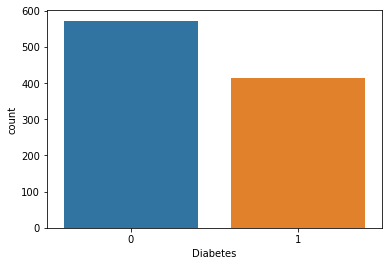

In [64]:
import seaborn as sns
sns.countplot(x="Diabetes", data = train)

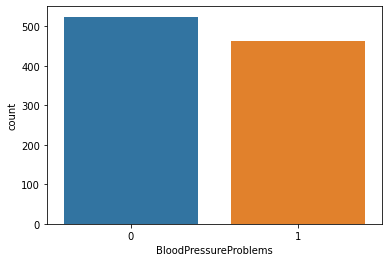

In [65]:
sns.countplot(x="BloodPressureProblems", data = train)

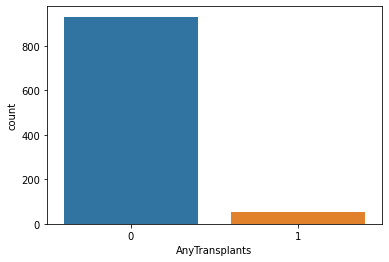

In [66]:
sns.countplot(x="AnyTransplants", data = train)

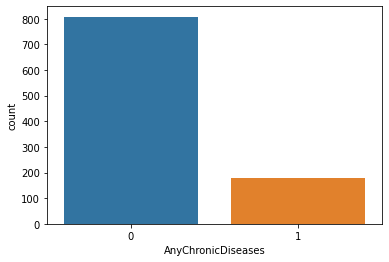

In [67]:
sns.countplot(x="AnyChronicDiseases", data = train)

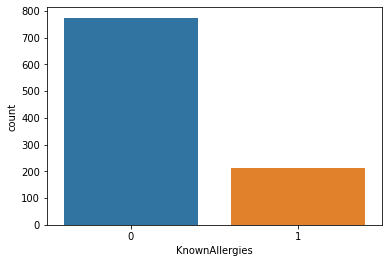

In [68]:
sns.countplot(x="KnownAllergies", data = train)

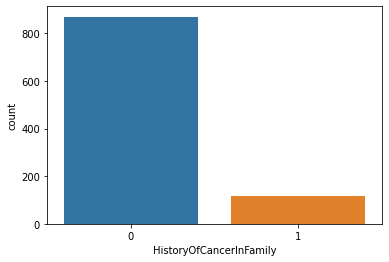

In [69]:
sns.countplot(x="HistoryOfCancerInFamily", data = train)

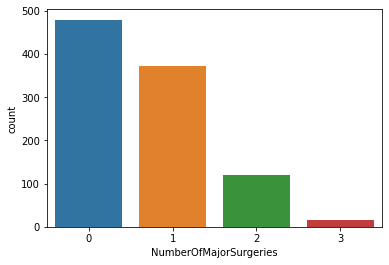

In [70]:
sns.countplot(x="NumberOfMajorSurgeries", data = train)

/home/user/test/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


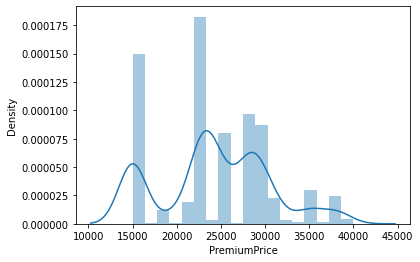

In [27]:
import seaborn as sns
sns.distplot(train['PremiumPrice'])

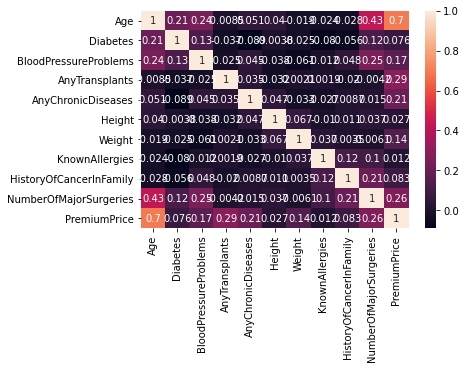

In [28]:
sns.heatmap(train.corr(),annot = True) #Just to see the correlation between the features and the label

In [6]:
train.shape

(986, 11)

In [9]:
X = train.iloc[:, 0:10]
y = train.iloc[:,10]

In [10]:
X

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,0,0,0
1,60,1,0,0,0,180,73,0,0,0
2,36,1,1,0,0,158,59,0,0,1
3,52,1,1,0,1,183,93,0,0,2
4,38,0,0,0,1,166,88,0,0,1
5,30,0,0,0,0,160,69,1,0,1
6,33,0,0,0,0,150,54,0,0,0
7,23,0,0,0,0,181,79,1,0,0
8,48,1,0,0,0,169,74,1,0,0
9,38,0,0,0,0,182,93,0,0,0


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Neural Network - MultiView Plain

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [13]:
seed = 7
np.random.seed(seed)

In [14]:
# Model
model = Sequential()
model.add(Dense(200, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())

In [19]:
feature_cols = X_train
labels = y_train

In [20]:
model.fit(np.array(feature_cols), np.array(labels), epochs=1000, batch_size=10)

Epoch 1/100
74/74 [==============================] - 0s 2ms/step - loss: 17103898.0000
Epoch 2/100
74/74 [==============================] - 0s 2ms/step - loss: 17103442.0000
Epoch 3/100
74/74 [==============================] - 0s 2ms/step - loss: 17102606.0000
Epoch 4/100
74/74 [==============================] - 0s 2ms/step - loss: 17101534.0000
Epoch 5/100
74/74 [==============================] - 0s 2ms/step - loss: 17101052.0000
Epoch 6/100
74/74 [==============================] - 0s 2ms/step - loss: 17100358.0000
Epoch 7/100
74/74 [==============================] - 0s 2ms/step - loss: 17100008.0000
Epoch 8/100
74/74 [==============================] - 0s 2ms/step - loss: 17099270.0000
Epoch 9/100
74/74 [==============================] - 0s 2ms/step - loss: 17098904.0000
Epoch 10/100
74/74 [==============================] - 0s 2ms/step - loss: 17097872.0000
Epoch 11/100
74/74 [==============================] - 0s 2ms/step - loss: 17097586.0000
Epoch 12/100
74/74 [=====================

In [21]:
# Evaluation on the test set created by train_test_split
model.evaluate(np.array(feature_cols), np.array(labels))

24/24 [==============================] - 0s 1ms/step - loss: 17073756.0000


17073756.0

# Neural Network - LSTM - Multi-View

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [29]:
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, [X_train.shape[0], X_train.shape[1], 1])
#print(X_train)

In [32]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))

regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

#------------------------------------------------------------------#
# Adding the third LSTM layer
#------------------------------------------------------------------#
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

#------------------------------------------------------------------#
# Adding the forth LSTM layer
#------------------------------------------------------------------#
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

#------------------------------------------------------------------#
# Adding the fifth LSTM layer
#------------------------------------------------------------------#
# note that this is the final LSTM layer, hence we change the binary argument to False
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#------------------------------------------------------------------#
# Adding output layer to the RNN to make a fully connected NN
#------------------------------------------------------------------#
# one dimensional real output
regressor.add(Dense(units = 1))



In [33]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [34]:
regressor.fit(X_train, y_train, epochs = 120, batch_size = 32)

Epoch 1/120
24/24 [==============================] - 1s 32ms/step - loss: 619227520.0000
Epoch 2/120
24/24 [==============================] - 1s 31ms/step - loss: 618928896.0000
Epoch 3/120
24/24 [==============================] - 1s 31ms/step - loss: 618797632.0000
Epoch 4/120
24/24 [==============================] - 1s 36ms/step - loss: 618717632.0000
Epoch 5/120
24/24 [==============================] - 1s 37ms/step - loss: 618647488.0000
Epoch 6/120
24/24 [==============================] - 1s 34ms/step - loss: 618577216.0000
Epoch 7/120
24/24 [==============================] - 1s 31ms/step - loss: 618517888.0000: 0s - loss: 652
Epoch 8/120
24/24 [==============================] - 1s 31ms/step - loss: 618449152.0000
Epoch 9/120
24/24 [==============================] - 1s 33ms/step - loss: 618387840.0000
Epoch 10/120
24/24 [==============================] - 1s 31ms/step - loss: 618323840.0000
Epoch 11/120
24/24 [==============================] - 1s 36ms/step - loss: 618262272.0000
Epo

# Machine Learning Regression

In [36]:
X = train.iloc[:, 0:10]
y = train.iloc[:,10]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Random Forest Regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=2, random_state=0)
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)

In [76]:
print(RF.score(X_test, y_test))

0.45742052625413754


In [77]:
from sklearn.metrics import mean_squared_error
RF = mean_squared_error(y_test, predictions)
RF

22012474.774023287

# Voting Regressor

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(random_state=1)
er = VotingRegressor([('lr', r1), ('rf', r2)])
er.fit(X_train, y_train)
predictions = er.predict(X_test)

In [79]:
print(er.score(X_test, y_test))

0.691662623702207


In [80]:
from sklearn.metrics import mean_squared_error
vot = mean_squared_error(y_test, predictions)
vot

12509261.861282218

# Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
r1 = LinearRegression()
r1.fit(X_train, y_train)
predictions = r1.predict(X_test)
print(r1.score(X_test, y_test))
from sklearn.metrics import mean_squared_error
lr = mean_squared_error(y_test, predictions)
lr

0.6218888805277106


15339985.904184688

# Decision Tree Regressor

In [83]:
from sklearn.tree import DecisionTreeRegressor
r1 = DecisionTreeRegressor(random_state=0)
r1.fit(X_train, y_train)
predictions = r1.predict(X_test)
print(r1.score(X_test, y_test))
from sklearn.metrics import mean_squared_error
dt = mean_squared_error(y_test, predictions)
dt

0.46491306747340966


21708502.024291497

# FNN - MLP

In [84]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
predictions = regr.predict(X_test)
print(regr.score(X_test, y_test))
from sklearn.metrics import mean_squared_error
fnn = mean_squared_error(y_test, predictions)
fnn

0.21109183621194205


/home/user/test/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


32006041.31688844

# Gradient Boosting Regressor

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)
print(reg.score(X_test, y_test))
from sklearn.metrics import mean_squared_error
gnb = mean_squared_error(y_test, predictions)
gnb

0.6222334538833287


15326006.546937762

# LAsso Model

In [86]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print(clf.score(X_test, y_test))
from sklearn.metrics import mean_squared_error
lasso = mean_squared_error(y_test, predictions)
lasso

0.6218752529420435


15340538.775976278

# Ridge

In [87]:
from sklearn.linear_model import Ridge
clf1 = Ridge(alpha=1.0)
clf1.fit(X_train,y_train)
predictions = clf1.predict(X_test)
print(clf1.score(X_test, y_test))
from sklearn.metrics import mean_squared_error
rid = mean_squared_error(y_test, predictions)
rid

0.6199842380999128


15417257.337079091

# Model Dumping

In [63]:
import joblib
filename = 'model.sav'
joblib.dump(er, filename)

['model.sav']

Note: from the above score & mse value voting regression has less mse value comparing to others